In [1]:
from typing import Tuple
import numpy as np
import matplotlib.pyplot as plt
import time


In [2]:
class Perceptron:
    def __init__(self, l_r=0.1) -> None:
        self.w = 0
        self.b = 0
        self.l_r = 0.1

    def sign(self, x):
        return np.sign(np.dot(self.w, x) + self.b)

    def fit(self, X, Y, iter=50, w=None, b=None, l_r=None):
        if w is not None:
            if np.shape(X)[1] == len(w):
                self.w = w
            else:
                raise ValueError(
                    "dimesion of w {} differs from X {}.".format(
                        len(w), np.shape(X)[1]
                    )
                )
        else:
            self.w = np.zeros(np.shape(X)[1])
        if b is not None:
            self.b = b
        if l_r is not None:
            self.l_r = l_r

        cur = wrong_times = 0
        while cur < iter:
            id = 0
            while id < len(X):
                if -1 * Y[id] * self.sign(X[id]) >= 0:
                    self.w += self.l_r * np.dot(Y[id], X[id])
                    self.b += self.l_r * Y[id]
                    wrong_times += 1
                id += 1
            cur += 1
            print("\riterated {}/{} times.".format(cur, iter), end="")
        print("", end="\n")
        print(
            "w {}, b {}, learning_rate {}, wrong times {}".format(
                self.w, self.b, self.l_r, wrong_times
            )
        )


################################################################################
# MNIST Data

In [3]:
def load_sk_data():
    import matplotlib.pyplot as plt
    import pandas as pd
    from sklearn.datasets import load_iris

    # load data
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df["label"] = iris.target
    df.columns = [
        "sepal length",
        "sepal width",
        "petal length",
        "petal width",
        "label",
    ]
    df.label.value_counts()
    data = np.array(df.iloc[:100, [0, 1, -1]])
    X, y = data[:, :-1], data[:, -1]
    Y = np.array([1 if i == 1 else -1 for i in y])
    return X, Y, data



In [4]:
# load sk data
X, Y, data = load_sk_data()


In [5]:
# train on sk data
start_time = time.time()
pc = Perceptron()
pc.fit(X, Y, 200)
end_time = time.time()
print("training costs {} s".format(end_time - start_time))


iterated 200/200 times.
w [ 5.36 -8.13], b -4.000000000000002, learning_rate 0.1, wrong times 440
training costs 0.33515477180480957 s


<ipython-input-6-40c643185f1c>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(data[:50, 0], data[:50, 1], "bo", color="blue", label="0")
<ipython-input-6-40c643185f1c>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(data[50:100, 0], data[50:100, 1], "bo", color="orange", label="1")


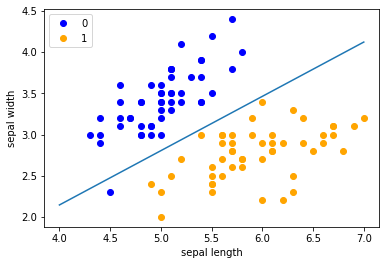

In [6]:
x_ = np.linspace(4, 7, 10)
y_ = -(pc.w[0] * x_ + pc.b) / pc.w[1]

plt.plot(x_, y_)
plt.plot(data[:50, 0], data[:50, 1], "bo", color="blue", label="0")
plt.plot(data[50:100, 0], data[50:100, 1], "bo", color="orange", label="1")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()



In [7]:
# sklearn example
from sklearn.linear_model import Perceptron

# sk_pc = Perceptron(fit_intercept=True, max_iter=50, shuffle=True)
# sk_pc.fit(X, Y)
# print(sk_pc.coef_)
# print(sk_pc.intercept_)
sk_pc = Perceptron(fit_intercept=True, max_iter=100, shuffle=True)
sk_pc.fit(X, Y)
sk_pc.score(X, Y)


0.99